# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

Make sure we have the ML-Agents from the 'python folder'. This is the equivalent of "!pip -q install ./python"

In [1]:
import os
import sys

p1_navigation_folder_path = os.path.abspath(os.path.join('../'))
sys.path.append(p1_navigation_folder_path)

unityagents_module_path = os.path.abspath(os.path.join('../../python'))
sys.path.append(unityagents_module_path)

# Importing necessary packages

In [2]:
import numpy as np
from collections import deque
import torch

import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="../Banana_Windows_x86_64/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Reset and examine the Environment

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Execute Agent in the Environment



self.model: Sequential(
  (fc1): Linear(in_features=37, out_features=296, bias=True)
  (relu1): ReLU()
)
self.model: Sequential(
  (fc1): Linear(in_features=37, out_features=296, bias=True)
  (relu1): ReLU()
)
Episode 100	Average Score: 1.14
Episode 200	Average Score: 4.15
Episode 300	Average Score: 7.85


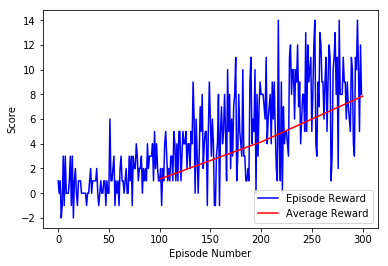

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

def duel_dqn(n_episodes=300, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    window_score_averages = [] # List of averages from each window
    eps = eps_start  # initialize epsilon
    
    for i_episode in range(1, n_episodes + 1):

        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]  # get the current state
        score = 0  # initialize the score

        for t in range(max_t):
            action = agent.act(state, eps)  # select an action
            env_info = env.step(action.astype(int))[brain_name]  # send the action to the environment

            next_state = env_info.vector_observations[0]  # get the next state
            reward = env_info.rewards[0]  # get the reward
            done = env_info.local_done[0]  # see if episode has finished

            agent.step(state, action, reward, next_state, done)

            score += reward  # update the score
            state = next_state  # roll over the state to next time step
            if done:  # exit loop if episode finished
                break
                
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon

        # when a new improved mean is observed, save model
        if i_episode == 1 or best_mean_score < np.mean(scores_window):
            best_mean_score = np.mean(scores_window)
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint{}.pth'.format(int(best_mean_score)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')


        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            window_score_averages.append((i_episode, np.mean(scores_window)))


        if np.mean(scores_window) >= 20.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break

    
    # plot performance
    line1, = plt.plot(np.linspace(0, i_episode, len(scores), endpoint=False), np.asarray(scores), color="blue", label='Episode Reward')
    
    time, average_scores = list(zip(*window_score_averages))
    line2, = plt.plot(list(time), list(average_scores),  color="red", label='Average Reward')
    
    plt.xlabel('Episode Number')
    plt.ylabel('Score')
    plt.legend(handles=[line1, line2], loc=4)
    
    plt.draw()
    plt.savefig("navigation_training_performance.pdf")
    env.close()

    return scores

scores = duel_dqn()